# Regresija

Regresiona analiza je jedna od najvaznijih polja u statistici i masinskom ucenju.

Regresija trazi zavisnosti medju varijablama.

Primer: Mozemo gledati zaposlene jedne kompanije i pokusati da razumemo kako
njihova plata zavisi od njihovih `osobina`, kao sto su iskustvo, stepen obrazovanja, uloga, i tako dalje.. 

Ovo je regresioni problem gde podaci za svakog zaposlenog predstavljaju jednu `opservaciju`.
Pretpostavka je da su gore-navedene `osobine` nezavisne.

U sustini, nas zadatak je da nadjemo funkciju koja povezuje `osobine` sa `osobinama` na dovoljno precizan nacin.

Zavisne `osobine` nazivamo `odgovorima`
Nezavisno `osobine` nazivamo `regresorima`

Simbolicka regresija je tehnika masinskog ucenja koja pokusava da identifikuje matematicki izraz koji najbolje opisuje vezu izmedju `odgovora` i `regresora` u cilju da predvidi nove ishode. 

Nas pristup ce biti genetski, gde ce svaka generacija zadrzati potomke koji su se najbolje pokazali i koristiti ih u buducim mutacijama.

Modeli masinskog ucenja su trenutno alatke koje se najpre koriste da otkriju zakone fizike. Iako pokazuju obecavajuce rezultate u otkrivanju fizickih osobina materijala, tipicni parametrizovani modeli koji su se do sada izvanredno pokazali u nagadjanju broja zarazenih za vreme globalne pandemije, ne mogu objasniti brojke do kojih su dosli, zbog cega je stepen njihove korisnosti ogranicen.

U ovom projektu, fokusiracemo se na alternativu za modele masinskog ucenja - **Simbolicku regresiju (SR)**


## Simbolicka Regresija
Simbolicka regresija u isto vreme trazi optimalnu formu funkcije i skup regresora za dati problem, i poprilicno je korisna tehnika regresije kada je malo poznato o samoj strukturi i distribuciji podataka za unos.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generacija inicijalnog skupa podataka
Rezultat ove funkcije je kombinacija linearnog $x$, $sin{x}$, $x^3$

Oblik krive i uvelicana slika jednog njegovog segmenta ce biti prikazane ispod

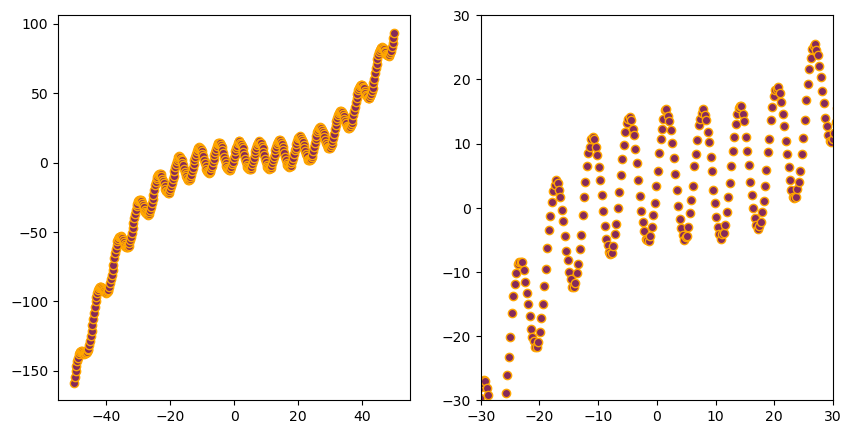

In [2]:
nsample = 400
sig = 0.2
x = np.linspace(-50, 50, nsample)
X = np.column_stack((x/5, 10*np.sin(x), (x-5)**3, np.ones(nsample)))
beta = [0.01, 1, 0.001, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
df = pd.DataFrame()
df['x']=x
df['y']=y


point_color = '#852a5b'
edgecolorsA = '#ffa600'
edgecolorsB = '#73fffa'

fig, (ax1, ax2) = plt.subplots(1,  2, figsize=(10,  5))

ax1.scatter(df['x'], df['y'], c=point_color, edgecolors=edgecolorsA, alpha=1.0)
ax2.scatter(df['x'], df['y'], c=point_color, edgecolors=edgecolorsA, alpha=1.0)
plt.xlim(-30, 30)
plt.ylim(-30,  30)

plt.show()

In [3]:
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *

## Razdvajanje skupa podataka

Kako cemo testirati razlicite pristupe ovom problemu, moramo razdeliti skup podataka na skup za treniranje i skup za testiranje



In [4]:
from sklearn.model_selection import train_test_split
X = df[['x']]
y = df['y']
y_true = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
X_test

,x
209,2.380952
280,20.175439
33,-41.729323
210,2.631579
93,-26.691729
...,...
60,-34.962406
79,-30.200501
285,21.428571
305,26.441103


In [6]:
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=45, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                          feature_names=X_train.columns)

In [7]:
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sin(x),
    'cos': lambda x    : cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow3': lambda x: x**3
}

In [8]:
est_gp.fit(X_train, y_train)
print('R2:',est_gp.score(X_test,y_test))
next_e = sympify(str(est_gp._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.94           3204.3       26           16.264          24.3905      1.91m
   1    11.70          515.115       11          15.9157          26.2225      1.90m
   2     9.01          78.1788        5          15.6302          34.1357      1.76m
   3     8.72          63.5483        8           15.694            27.91      1.64m
   4     8.59          49.9751        9          15.4963          30.7787      1.65m
   5     9.20           59.528       10          15.2259          33.5376      1.58m
   6     9.17          49.3901       26           15.554          28.7349      1.59m
   7     9.22          66.7484       18           15.512          28.8065      1.53m
   8     8.91          35.2396       20          15.3527          31.0638  

1.39225335549925*x - 13.5380222828997*sin(0.092*x) - sin(0.112*x) + 8.32190589868231*sin(x) - 2.64235698242833*sin(0.092*x - 0.092) - 1.51859596691283*sin(sin(0.092*x) - 0.092) + 1.51859596691283*sin(cos(0.092*x) + 0.092) + 1.74551260564693*sin(sin(0.112*x)) + 1.32117849121416*sin(sin(sin(cos(0.092*x)))) + 6.80330993176948*cos(0.092*x) - 3.8672795021435

In [9]:
est_tree = DecisionTreeRegressor(max_depth=5)
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor(n_estimators=100,max_depth=5)
est_rf.fit(X_train, y_train)
y_gp = est_gp.predict(X_test)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(X_test)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(X_test)
score_rf = est_rf.score(X_test, y_test)

In [10]:
print('score_gp: ' + str(score_gp),
'score_tree: ' + str(score_tree),
'score_rf: ' + str(score_rf),
sep='\n'
)

score_gp: 0.9213331333400879
score_tree: 0.9922527109345003
score_rf: 0.9931146132443277


<Figure size 640x480 with 0 Axes>

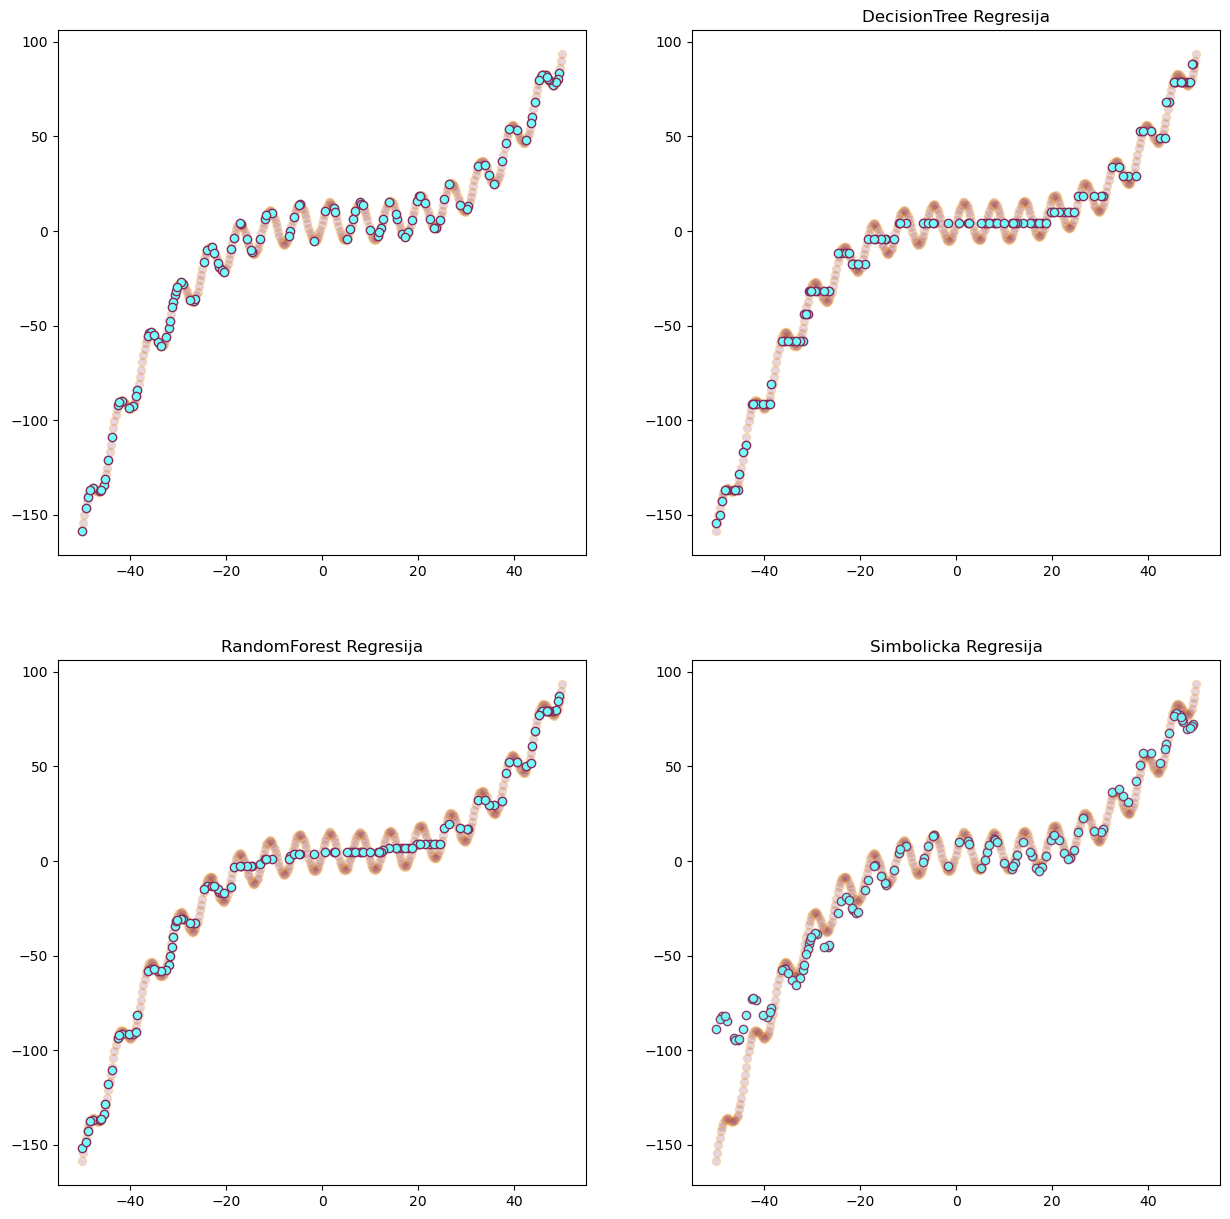

In [11]:
plt.clf()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,  2, figsize=(15,  15))


ax1.scatter(X, y_true, c=point_color, edgecolors=edgecolorsA, alpha=0.2)
ax1.scatter(X_test, y_test, c=edgecolorsB, edgecolors=point_color, alpha=1.0)

ax2.set_title("DecisionTree Regresija")
ax2.scatter(X, y_true, c=point_color, edgecolors=edgecolorsA, alpha=0.2)
ax2.scatter(X_test, y_tree, c=edgecolorsB, edgecolors=point_color, alpha=1.0)

ax3.set_title("RandomForest Regresija")
ax3.scatter(X, y_true, c=point_color, edgecolors=edgecolorsA, alpha=0.2)
ax3.scatter(X_test, y_rf, c=edgecolorsB, edgecolors=point_color, alpha=1.0)

ax4.set_title("Simbolicka Regresija")
ax4.scatter(X, y_true, c=point_color, edgecolors=edgecolorsA, alpha=0.2)
ax4.scatter(X_test, y_gp, c=edgecolorsB, edgecolors=point_color, alpha=0.9)

plt.show()

Na plotovima iznad mozemo primetiti da iako rezultati nisu izvanredno dobri u poredjenju sa drugim tehnikama, nasa analiticka funkcija se mnogo bolje pokazala u sredisnjim segmentima.

In [12]:
from gplearn.functions import make_function

def pow_3(x1):
    f = x1**3
    return f

pow_3 = make_function(function=pow_3,name='pow3',arity=1)

function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv', pow_3]

est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=45, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                           feature_names=X_train.columns)
est_gp.fit(X_train, y_train)
print('R2:',est_gp.score(X_test,y_test))
next_e = sympify(str(est_gp._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.13       2.8592e+61       22          16.2699          27.9501      2.01m
   1    10.68      2.35374e+42       20          13.8683          16.1752      2.04m
   2     9.09      8.16763e+13       19          13.5129          21.5791      1.74m
   3     8.24      6.89542e+55       20           13.649          18.1488      1.60m
   4     9.63      3.44649e+21       22          13.2671          20.9276      1.68m
   5    14.98      1.10938e+46       25          13.1349           21.647      1.89m
   6    20.16      4.69205e+45       19          11.3205          12.2549      1.95m
   7    21.90      5.19681e+45       25          11.0005          10.5694      1.94m
   8    23.40      5.02998e+45       25          10.7908           11.076  

0.125838173497617*(0.200284516322252*x - 1)**3 + 9.00393378416732*sin(x) + sin(sin(x)) + cos(sin(sin(cos(sin(x))))) + 4.09244316922037

In [13]:
est_tree = DecisionTreeRegressor(max_depth=5)
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor(n_estimators=100,max_depth=5)
est_rf.fit(X_train, y_train)
y_gp = est_gp.predict(X_test)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(X_test)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(X_test)
score_rf = est_rf.score(X_test, y_test)

In [14]:
print('score_gp: ' + str(score_gp),
'score_tree: ' + str(score_tree),
'score_rf: ' + str(score_rf),
sep='\n'
)

score_gp: 0.9999583791868003
score_tree: 0.9922527109345003
score_rf: 0.9931146132443277


<Figure size 640x480 with 0 Axes>

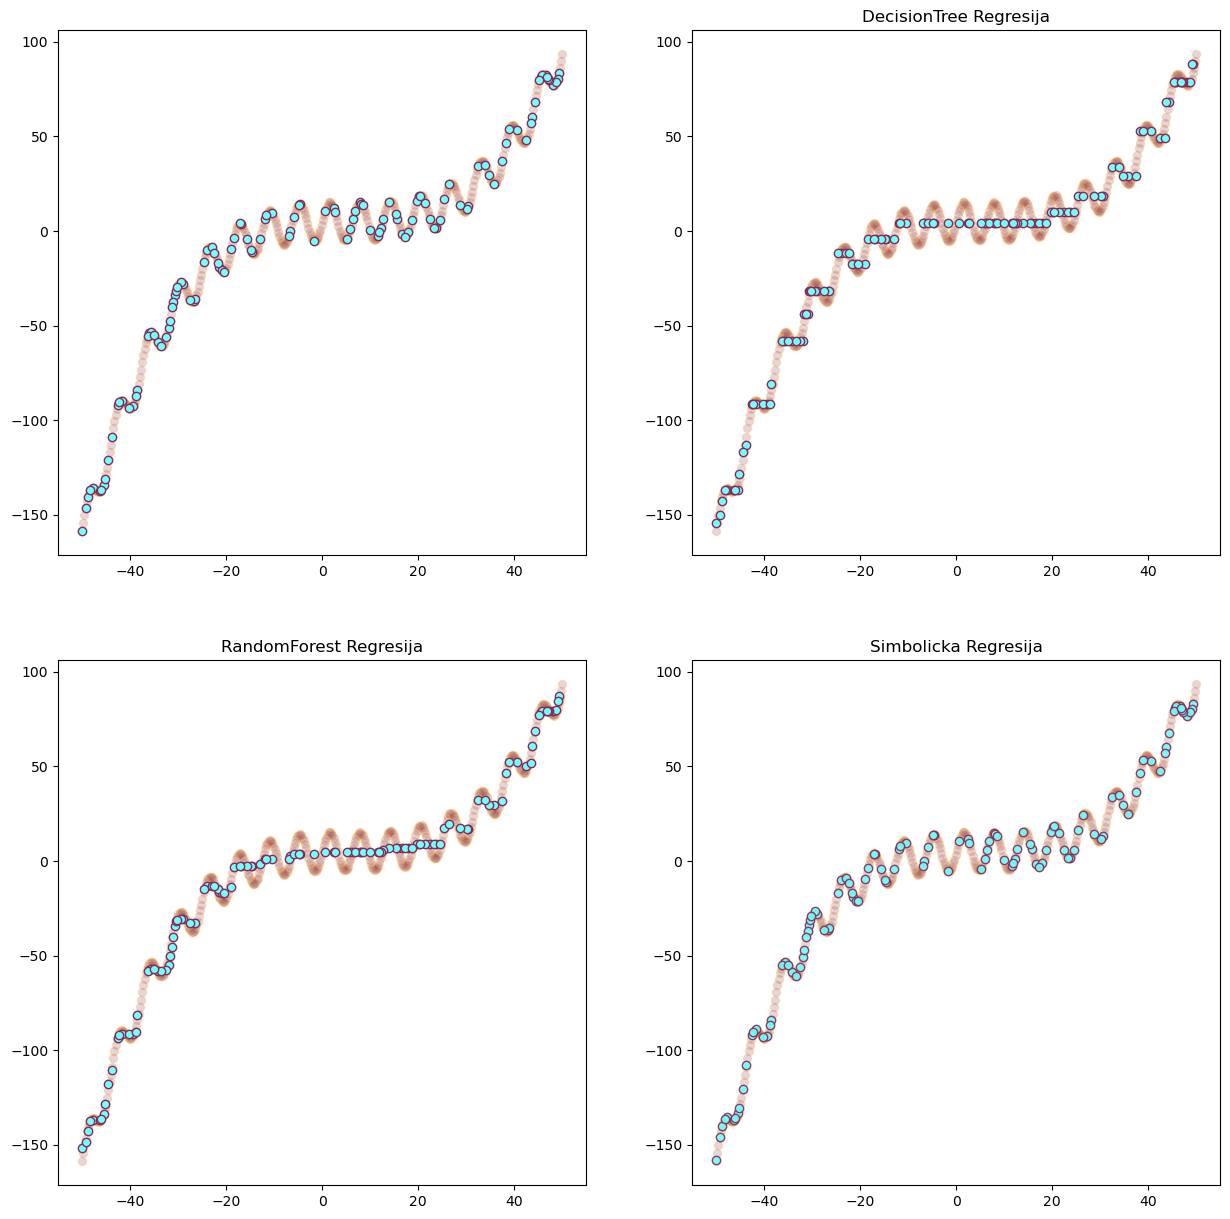

In [15]:
plt.clf()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,  2, figsize=(15,  15))


ax1.scatter(X, y_true, c=point_color, edgecolors=edgecolorsA, alpha=0.2)
ax1.scatter(X_test, y_test, c=edgecolorsB, edgecolors=point_color, alpha=1.0)

ax2.set_title("DecisionTree Regresija")
ax2.scatter(X, y_true, c=point_color, edgecolors=edgecolorsA, alpha=0.2)
ax2.scatter(X_test, y_tree, c=edgecolorsB, edgecolors=point_color, alpha=1.0)

ax3.set_title("RandomForest Regresija")
ax3.scatter(X, y_true, c=point_color, edgecolors=edgecolorsA, alpha=0.2)
ax3.scatter(X_test, y_rf, c=edgecolorsB, edgecolors=point_color, alpha=1.0)

ax4.set_title("Simbolicka Regresija")
ax4.scatter(X, y_true, c=point_color, edgecolors=edgecolorsA, alpha=0.2)
ax4.scatter(X_test, y_gp, c=edgecolorsB, edgecolors=point_color, alpha=0.9)

plt.show()

Ukoliko bismo uporedili trenutni i prosli plot za **SR**, primetili bismo da je model mnogo pouzdaniji, a dokaz za to mozemo videti u R2 metrikama. Time sto smo rucno dodali funkciju u listu funkcija koje se koriste u svrhe simbolicke regresije, uprostili smo model - cime smo najpre sprecili overfitting.

# Kombinovanje **GridSearchCV** sa **SR**

GridSearchCV odredjuje najbolje parametre tako sto vrsi pretragu
kroz mrezu hiperparametara za dati model i optimizuje model masinskog ucenja tako sto trenira i evaluira model za svaku kombinaciju hiperparametara koristeci medju-validaciju. Poprilicno je rasprostranjene upotrebe. Takodje cemo u koraku pretprocesiranja standardizovati podatke koristeci StandardScaler iz sklearn biblioteke. 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from gplearn.genetic import SymbolicRegressor

In [ ]:
from gplearn.functions import make_function
from sklearn.model_selection import GridSearchCV
def pow_3(x1):
    f = x1**3
    return f

pow_3 = make_function(function=pow_3,name='pow3',arity=1)

function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv', pow_3]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=45, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                           feature_names=X_train.columns))
])

param_grid = {
    'regressor__generations': [35,  45,  55],
    'regressor__p_crossover': [0.7,  0.8,  0.9],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, refit=True)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)
print('R2:', grid_search.score(X_test, y_test))

pipeline.fit(X_train, y_train)
print('R2:',pipeline.score(X_test,y_test))


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.13      5.47893e+23       12          9.32371          9.92551      1.45m
   1    12.41      2.37641e+20       12          9.26538          10.4352      1.50m
   2    14.77       1.4324e+60       23          6.94893          7.48739      1.50m
   3    12.99     1.56324e+104       23          6.84154          8.42591      1.37m
   4    13.15      3.60212e+34       23          7.02252          6.84423      1.40m
   5    14.46      6.46585e+48       25          6.67675          8.22546      1.42m
   6    14.26      8.61335e+61       25          6.76777          7.43002      1.38m
   7    15.03      6.62078e+68       23          6.58333          6.64084      1.41m
   8    18.72      2.68969e+21       21           6.3663          7.45178  

  18    16.01      1.05506e+18       18          5.90774          8.56899     47.55s
  19    16.32      3.57454e+24       19          5.90695          8.01332     44.78s
  20    16.08      1.40411e+22       19          5.90459          8.18455     40.65s
  21    16.00      1.08927e+18       16          5.92527          7.92765     40.29s
  22    15.83           209860       15          5.90552          8.32177     34.04s
  23    15.43      2.33638e+23       21          5.87293          8.93418     31.94s
  24    15.28      4.15143e+20       13          5.90867          8.44888     27.91s
  25    14.93      6.91438e+43       15           5.8707          8.62607     24.63s
  26    15.20      7.53547e+17       16          5.84778          10.0452     22.83s
  27    15.20       1.3275e+17       19          5.81168          5.25807     19.21s
  28    14.94      2.36284e+63       19          5.66782          6.51529     16.45s
  29    14.99      7.83476e+18       19          5.60172         

   1    12.41      2.37641e+20       12          9.26538          10.4352      1.82m
   2    14.77       1.4324e+60       23          6.94893          7.48739      1.86m
   3    12.99     1.56324e+104       23          6.84154          8.42591      1.76m
   4    13.15      3.60212e+34       23          7.02252          6.84423      1.71m
   5    14.46      6.46585e+48       25          6.67675          8.22546      1.81m
   6    14.26      8.61335e+61       25          6.76777          7.43002      1.63m
   7    15.03      6.62078e+68       23          6.58333          6.64084      1.61m
   8    18.72      2.68969e+21       21           6.3663          7.45178      1.67m
   9    20.57     5.11227e+200       21          6.40284          7.13248      1.75m
  10    20.59      1.68161e+66       21          6.32687          7.79635      1.63m
  11    20.61      7.19813e+17       34          6.20374          6.61411      1.62m
  12    21.54      1.61879e+18       34          6.13723         

   2    14.06      6.69869e+59        9          7.05658          6.65598      1.89m
   3    12.67      2.90537e+60        9          6.79041          8.98208      1.89m
   4    11.93      2.90527e+57       18          6.71045          6.62173      1.75m
   5    12.04      1.33852e+53       18           6.6355          7.27675      1.81m
   6    12.55      3.17791e+52       22          6.31867          7.87954      1.68m
   7    10.71       2.1975e+14        8          6.38654          8.30749      1.74m
   8    10.26      7.57334e+21       22          6.28338           8.1879      1.64m
   9     9.91      1.3324e+202        8          6.28738          9.17408      1.49m
  10     8.44      4.28419e+52       18          6.18416          6.20109      1.41m
  11     8.36       1.3304e+17       18          6.03434          7.51043      1.36m
  12     8.88       2.3721e+63       19          6.06971          6.98673      1.48m
  13    10.02     3.50095e+138       19          6.02798         